In [25]:
import numpy as np

# Do some Bayesian flaring analysis!

In [4]:
# get likelihood functions, prior distributions
from siberianpine.loglikelihoods import mixedmodel_loglikelihood
from siberianpine.priors import uninformative_prior, gaussian_prior

# get the analysis toolkit
from siberianpine.bayes import BayesianFlaringAnalysis

# get the utils
from siberianpine.utils import generate_synthetic_bfa_input
from siberianpine.mixedmodels import MixedModel

### Produce some fake data to work with:

# Define a likelihood function and go!

In [163]:
def my_mixedmodel_loglikelihood(theta, *args):
    def prior(x):
        return gaussian_prior(x, 2., .5) # mu and sigma
    return mixedmodel_loglikelihood(theta, *args, prior=prior)

In [164]:
BFA = [BayesianFlaringAnalysis(**generate_synthetic_bfa_input(flares_per_day=i)) for i in [2,2,2,2]]
MM = MixedModel(BFA=BFA, loglikelihood=my_mixedmodel_loglikelihood, alpha_prior=2.)

In [165]:
# Run MCMC to sample the posterior distribution
MM.sample_posterior_with_mcmc()

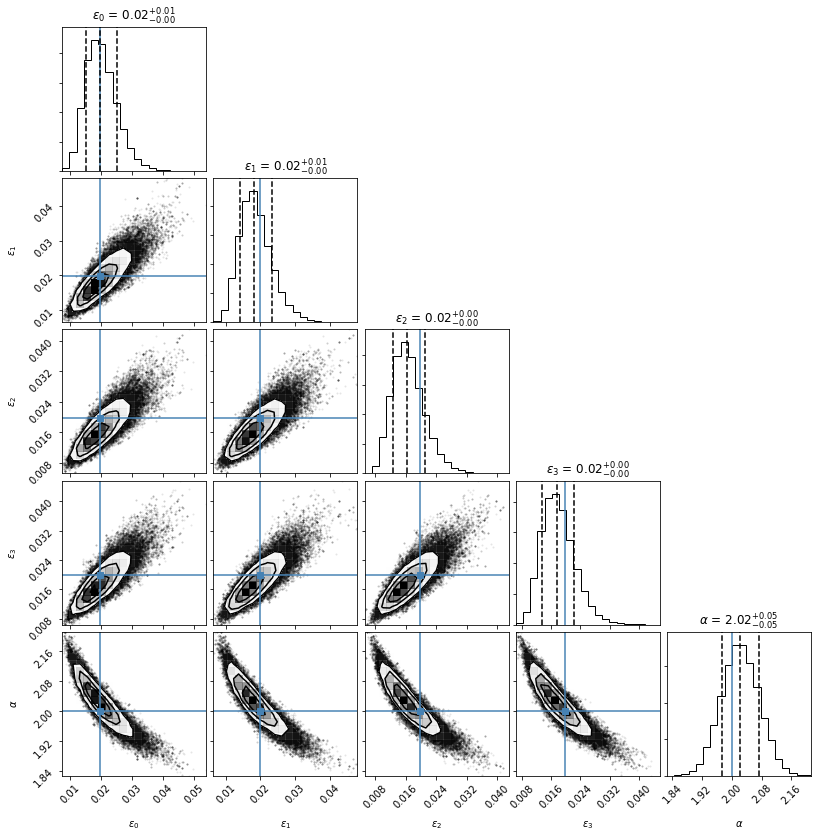

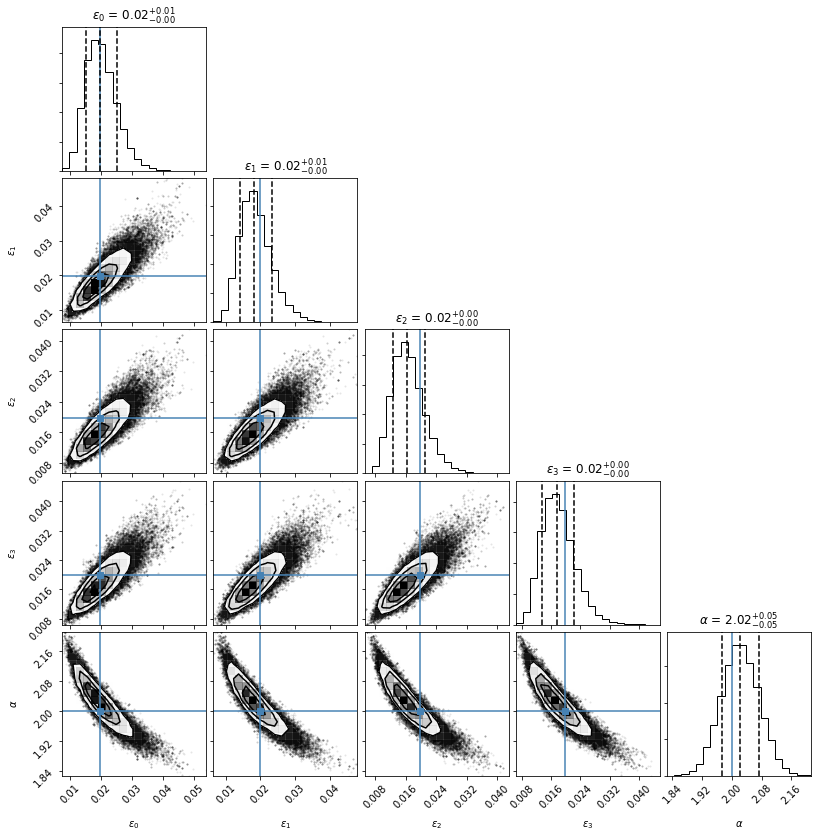

In [166]:
MM.show_corner_plot()